In [1]:
# É necessário instalar o pyarrow para importar o arquivo de acervos que está em formato parquet
#!pip install pyarrow

In [2]:
# Importando as bibliotecas
import os 
import pandas as pd
import requests
import seaborn as sns
from bs4 import BeautifulSoup

In [3]:
# Utilizando BeautifulSoup para coletar o nome dos arquivos csv

# Url do repositório
url_repositorio = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/tree/main/Dia_1-Importando_dados/Datasets/dados_emprestimos?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Python+Pandas+1%2F7%3A+Importa%C3%A7%C3%A3o+de+dados&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Python+Pandas+-+1%C2%AA+Ed+%29+1%2F7'
# Extraindo o HTML utilizando a biblioteca requests
html_github = requests.get(url_repositorio).content
# Fazendo o parse do HTML com BeautifulSoup
soup = BeautifulSoup(html_github, 'html.parser')
# Extraindo todos os links do site
links_do_site = soup.find_all('a')
# Selecionando o texto dos links, quando este texto termina em .csv
arquivos = [arquivo.text for arquivo in links_do_site if arquivo.text.endswith('.csv')]

In [4]:
# Visualizando a lista de arquivos csv
arquivos

['emprestimos-20101.csv',
 'emprestimos-20102.csv',
 'emprestimos-20111.csv',
 'emprestimos-20112.csv',
 'emprestimos-20121.csv',
 'emprestimos-20122.csv',
 'emprestimos-20131.csv',
 'emprestimos-20132.csv',
 'emprestimos-20141.csv',
 'emprestimos-20142.csv',
 'emprestimos-20151.csv',
 'emprestimos-20152.csv',
 'emprestimos-20161.csv',
 'emprestimos-20162.csv',
 'emprestimos-20171.csv',
 'emprestimos-20172.csv',
 'emprestimos-20181.csv',
 'emprestimos-20182.csv',
 'emprestimos-20191.csv',
 'emprestimos-20192.csv',
 'emprestimos-20201.csv']

In [5]:
# Utilizando o módulo OS para concatenar a URL base com cada arquivo csv encontrado, para encontrar a URL raw
url_base = 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/'
lista_raw_urls = [os.path.join(url_base, arquivo) for arquivo in arquivos]

In [6]:
# Visualizando as URLs
lista_raw_urls

['https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20101.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20102.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20111.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20112.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20121.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20122.csv',
 'https://raw.githubus

In [7]:
# Agora com as URLs definidas, serão criados os dataframes usando a biblioteca pandas

# A função recebe a url e o dataframe gerado em cada iteração, e vai adicionando as linhas de cada um
def criarDataframe(url, dataframe = None):
    # Lê o novo dataframe
    novo_dataframe = pd.read_csv(url)
    
    # Se o parâmetro dataframe não for None, concatena com o dataframe anterior, senão retorna o próprio dataframe gerado
    if dataframe is not None:
        dataframe_concatenado = pd.concat([dataframe, novo_dataframe], axis = 0)
        return dataframe_concatenado
    else:
        return novo_dataframe

In [8]:
# dataframe inicializa como None
dataframe_emprestimos = None

# Em cada iteração, dataframe vai concatenando com o dataframe anterior
for url in lista_raw_urls:
    dataframe_emprestimos = criarDataframe(url, dataframe_emprestimos)

In [9]:
# Informações sobre o dataframe de empréstimos
dataframe_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258018 entries, 0 to 26560
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 137.8+ MB


In [10]:
# Verificando se existem dados duplicados pelo id do empréstimo
dataframe_emprestimos[dataframe_emprestimos['id_emprestimo'].duplicated()]

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
5,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
6,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
7,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
19,709698,2009047725,2010/01/18 14:44:41.163000000,2010/01/04 09:21:19.099000000,2010/02/02 12:02:38.444000000,2.009047e+09,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...
118709,2470155,2016003570,2017/07/13 17:05:20.724000000,2017/06/30 17:21:20.182000000,2017/08/01 21:25:45.000000000,2.016013e+10,ALUNO DE GRADUAÇÃO
118710,2470156,2010029596,NaN,2017/06/30 17:22:25.697000000,2017/07/06 14:39:02.000000000,2.017102e+10,ALUNO DE PÓS-GRADUAÇÃO
118711,2470157,2008011634,NaN,2017/06/30 17:35:47.894000000,2017/07/03 18:22:24.000000000,2.015101e+09,ALUNO DE PÓS-GRADUAÇÃO
118712,2470158,2010013931,2017/07/29 11:30:11.506000000,2017/06/30 17:36:39.394000000,2017/08/29 19:01:53.000000000,2.017101e+10,ALUNO DE PÓS-GRADUAÇÃO


In [11]:
# Existem 145312 linhas duplicadas, que devem ser removidas
dataframe_emprestimos.drop_duplicates(subset='id_emprestimo', inplace= True)

In [12]:
# Importando o arquivo com informações do acervo, que está em formato parquet
url_acervos = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet'
dataframe_acervo = pd.read_parquet(url_acervos)

In [13]:
# Informações do dataframe de acervos
dataframe_acervo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546237 entries, 0 to 568584
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  546237 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 33.3+ MB


In [14]:
# Visualizando as primeiras linhas
dataframe_acervo.head(5)

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


O dataframe acervos funciona como uma tabela dimensão para o dataframe empréstimos, que seria a tabela fato. No acervo constam informações a respeito do exemplar que foi emprestado. Para uma melhor análise, é preciso levar as informações do acervo para o dataframe de empréstimos.

In [15]:
''' Verificando se o dataframe_emprestimos contém alguma informação nula nos códigos de barras, pois é a coluna que será 
utilizada para o join '''
dataframe_emprestimos['codigo_barras'].isnull().sum()

0

In [16]:
# Como não existem valores nulos, basta realizar um join
dataframe_analise = dataframe_emprestimos.merge(dataframe_acervo, how='left', on='codigo_barras')

In [17]:
# Visualizando o dataframe gerado
dataframe_analise.head(5)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,25009.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,75019.0
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,44494.0
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,91736.0


In [18]:
# Verificando se foram gerados dados nulos ao realizar o join
dataframe_analise.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1220242
data_emprestimo               0
data_devolucao             6457
matricula_ou_siape         2977
tipo_vinculo_usuario          0
id_exemplar              183524
colecao                  183524
biblioteca               183524
status_material          183524
localizacao              183524
registro_sistema         183524
dtype: int64

In [19]:
# Foram gerados 183524 dados nulos. Provavelmente algum código não estava no acervo e deve ser verificado
codigos_barra_nao_encontrados = list(dataframe_analise[dataframe_analise['id_exemplar'].isnull()]['codigo_barras'].unique())
len(codigos_barra_nao_encontrados)

38540

Observa-se que existem 38540 códigos, resultando em 183524 linhas, que não foram encontrados no acervo. Isso pode ter ocorrido devido a algum erro de digitação do código, ou por um erro na atualização do acervo. Inicialmente, estes dados serão mantidos, mas dependendo da análise a ser feita, podem vir a ser retirados futuramente.

A coluna localizacao traz números decimais, que seguem o CDU (Classificação Decimal Universal), que é um sistema de classificação documentária para definir a classe de cada assunto, que segue a seguinte regra:
000 a 099: Generalidades. Ciência e conhecimento.
100 a 199: Filosofia e psicologia.
200 a 299: Religião.
300 a 399: Ciências sociais.
400 a 499: Classe vaga. Provisoriamente não ocupada.
500 a 599: Matemática e ciências naturais.
600 a 699: Ciências aplicadas.
700 a 799: Belas artes.
800 a 899: Linguagem. Língua. Linguística.
900 a 999: Geografia. Biografia. História.
Com isso, será definida uma coluna que contém a classe, de acordo com o CDU.

In [20]:
# Função que será usada para criar a coluna de classe
def definir_classe(localizacao):
    if localizacao >= 0  and localizacao < 100:
        return 'Generalidades. Ciência e conhecimento.'
    elif localizacao >= 100 and localizacao < 200:
        return 'Filosofia e psicologia.'
    elif localizacao >= 200 and localizacao < 300:
        return 'Religião.'
    elif localizacao >= 300 and localizacao < 400:
        return 'Ciências sociais.'
    elif localizacao >= 400 and localizacao < 500:
        return 'Classe vaga. Provisoriamente não ocupada.'
    elif localizacao >= 500 and localizacao < 600:
        return 'Matemática e ciências naturais.'
    elif localizacao >= 600 and localizacao < 700:
        return 'Ciências aplicadas.'
    elif localizacao >= 700 and localizacao < 800:
        return 'Belas artes.'
    elif localizacao >= 800 and localizacao < 900:
        return 'Linguagem. Língua. Linguística.'
    elif localizacao >= 900 and localizacao < 1000:
        return 'Geografia. Biografia. História.'
    else:
        return 'Classe não localizada.'
    
# Criando uma coluna no dataframe utilizando a função criada
dataframe_analise['classe'] = dataframe_analise['localizacao'].apply(definir_classe)

In [21]:
# Excluindo a coluna registro_sistema que não faz sentido para a análise
dataframe_analise.drop(columns = 'registro_sistema', inplace = True)

In [22]:
# Alterando o tipo da coluna matricula_ou_siape para string para melhorar a visualização
dataframe_analise['matricula_ou_siape'] = dataframe_analise['matricula_ou_siape'].astype(str)
# Retirando a casa decimal, que no caso da matrícula é irrelevante, já que é sempre .0
dataframe_analise['matricula_ou_siape'] = dataframe_analise['matricula_ou_siape'].apply(lambda x: x.replace('.0',''))

In [23]:
# Visualizando o dataframe alterado
dataframe_analise.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas.
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas.
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas.
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas.
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas.


In [24]:
# Informações do dataframe
dataframe_analise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142804 entries, 0 to 2142803
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    object 
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           float64
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
 12  classe                object 
dtypes: float64(2), int64(1), object(10)
memory usage: 228.9+ MB


In [25]:
# Convertendo as colunas de data para o formato datetime
dataframe_analise['data_renovacao'] = pd.to_datetime(dataframe_analise['data_renovacao'])
dataframe_analise['data_emprestimo'] = pd.to_datetime(dataframe_analise['data_emprestimo'])
dataframe_analise['data_devolucao'] = pd.to_datetime(dataframe_analise['data_devolucao'])

In [26]:
# Organizando as colunas que estava em formato float e na verdade funcionam melhor como string
dataframe_analise['id_exemplar'] = dataframe_analise['id_exemplar'].astype(str)
dataframe_analise['id_exemplar'] = dataframe_analise['id_exemplar'].apply(lambda x: x.replace('.0',''))
dataframe_analise['localizacao'] = dataframe_analise['localizacao'].astype(str)
dataframe_analise['localizacao'] = dataframe_analise['localizacao'].apply(lambda x: x.replace('.0',''))

In [27]:
# Verificando quantos exemplares foram emprestados por ano
dataframe_analise['ano_emprestimo'] = dataframe_analise['data_emprestimo'].apply(lambda x: x.year)

exemplares_por_ano = dataframe_analise[['ano_emprestimo', 'id_emprestimo']].groupby('ano_emprestimo').nunique()
exemplares_por_ano

,id_emprestimo
ano_emprestimo,
2010,196035
2011,229360
2012,250037
2013,259286
2014,235310
2015,224853
2016,225893
2017,110326
2018,202080


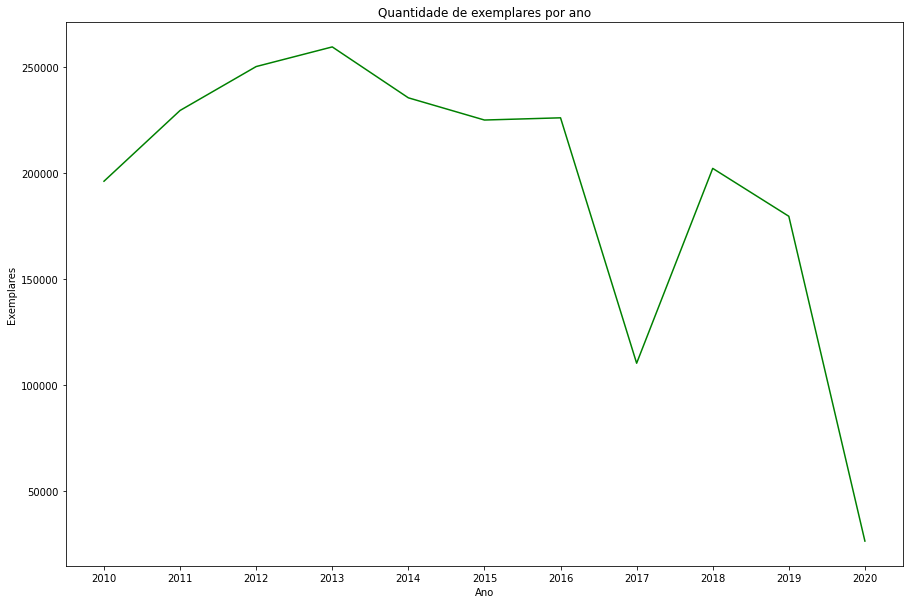

In [28]:
# Criando um gráfico de linhas para mostrar a quantidade de exemplares emprestados por ano
ax = sns.lineplot(data=exemplares_por_ano, x='ano_emprestimo', y='id_emprestimo', color='green')
ax.set_xlabel('Ano')
ax.set_ylabel('Exemplares')
ax.set_title('Quantidade de exemplares por ano')
ax.set_xticks(range(2010,2021))
ax.figure.set_size_inches(15,10)

Analisando o gráfico de empréstimos por ano, é possível notar uma tendência de baixa dos empréstimos com o passar dos anos. Houve um aumento até o ano de 2013, e após isso os números foram caindo, tendo um pico de baixa no ano de 2017.

In [29]:
# Verificando quantos empréstimos foram realizados por mês
dataframe_analise['mes_emprestimo'] = dataframe_analise['data_emprestimo'].apply(lambda x: x.month)

emprestimos_por_mes = dataframe_analise[['mes_emprestimo', 'id_emprestimo']].groupby('mes_emprestimo').nunique()
emprestimos_por_mes

,id_emprestimo
mes_emprestimo,
1,66791
2,205886
3,246266
4,208481
5,198909
6,133347
7,130611
8,252681
9,226791


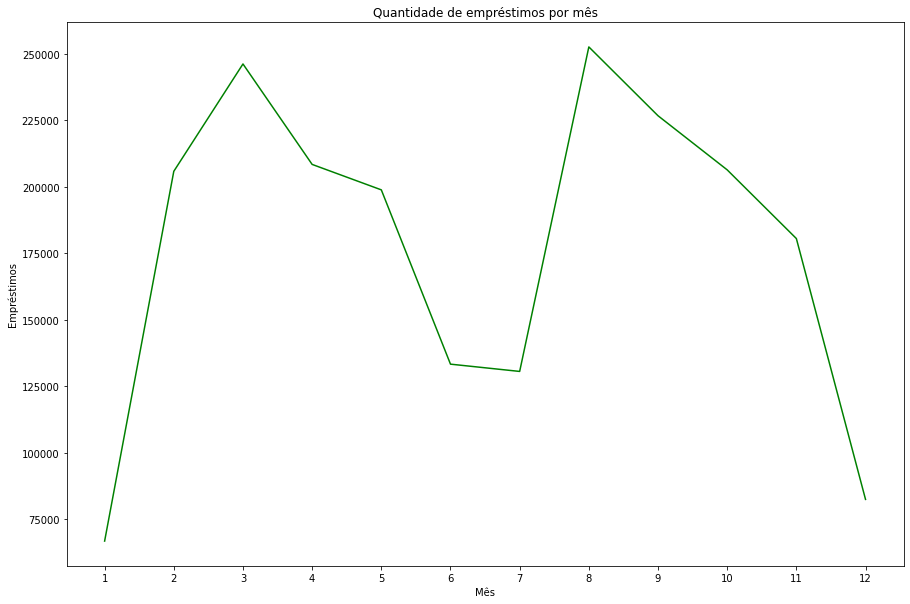

In [30]:
# Criando um gráfico de linhas para mostrar a quantidade de exemplares emprestados por mês
ax = sns.lineplot(data=emprestimos_por_mes, x='mes_emprestimo', y='id_emprestimo', color='green')
ax.set_xlabel('Mês')
ax.set_ylabel('Empréstimos')
ax.set_title('Quantidade de empréstimos por mês')
ax.set_xticks(range(1,13))
ax.figure.set_size_inches(15,10)

Analisando os empréstimos de forma mensal, verifica-se que há picos nos meses de março e agosto, com uma redução significativa em junho, julho, dezembro e janeiro, provavelmente devido ao período de férias escolares.

In [31]:
# Verificando os horários dos empréstimos
dataframe_analise['hora_emprestimo'] = dataframe_analise['data_emprestimo'].apply(lambda x: x.hour)

emprestimos_por_horario = dataframe_analise[['hora_emprestimo', 'id_emprestimo']].groupby('hora_emprestimo').nunique()
emprestimos_por_horario

,id_emprestimo
hora_emprestimo,
0,61
6,18
7,20361
8,107018
9,135513
10,189011
11,179174
12,147282
13,127996


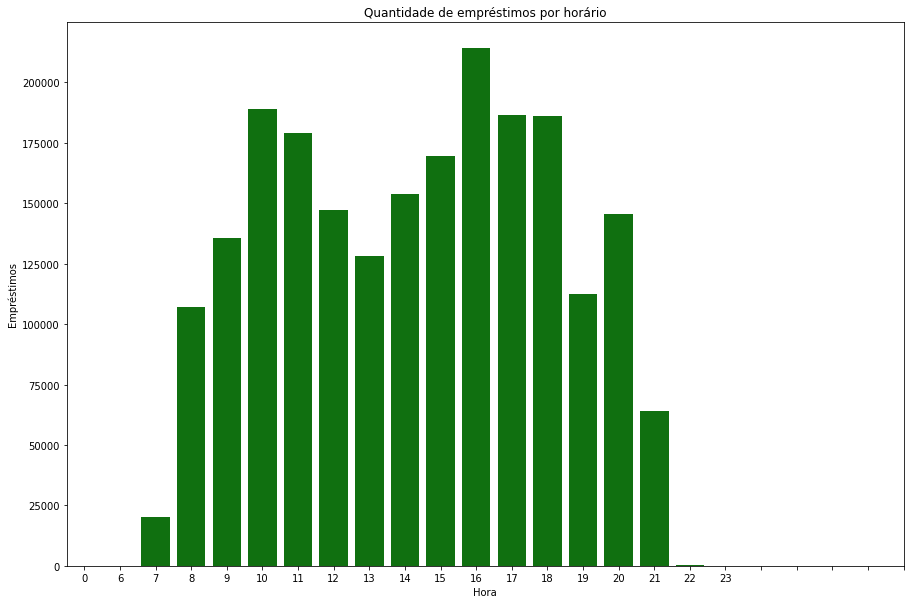

In [32]:
# Criando um gráfico de linhas para mostrar a quantidade de empréstimos por hora
ax = sns.barplot(data=emprestimos_por_horario, x=emprestimos_por_horario.index, y='id_emprestimo', color='green')
ax.set_xlabel('Hora')
ax.set_ylabel('Empréstimos')
ax.set_title('Quantidade de empréstimos por horário')
ax.set_xticks(range(0,24))
ax.figure.set_size_inches(15,10)

Analisando o gráfico de empréstimos por horário, verifica-se que a grande maioria dos empréstimos é feita por volta das 10:00 e entre 15:00 e 18:00. Outras atividades que não sejam de atendimento ao usuário poderiam ser realizadas antes das 9:00, por volta das 13:00 e após as 18:00 para um melhor aproveitamento.